<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
a = np.ones(15)  # just random thing
print(a)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [4]:
sigmoid(3,.5,2)

0.9706877692486436

In [0]:
x = np.linspace(-10,10,100)
w = 2.7   #@param {type: "slider", min: -3, max: 3, step: 0.1}
b = 0.8     #@param {type: "slider", min: -3, max: 3, step: 0.1}
y = sigmoid(x, w, b)

In [6]:
type(y)

numpy.ndarray

In [0]:
print(y)

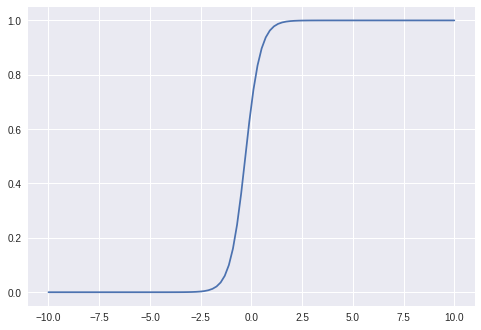

In [8]:
plt.plot(x,y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [10]:
sigmoid_2d(3, 0, .5, 0, 2)

0.9706877692486436

In [0]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

Y = sigmoid_2d(x1, x2, 0.5, .5 ,2)  #this takes respective values of x1 & x2 like at index 0,0 then 1,1 & returns a 100 element list in Y

In [12]:
print(len(Y))

100


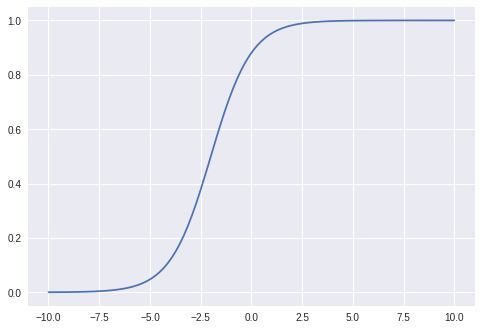

In [13]:
plt.plot(x1, Y)
plt.show()

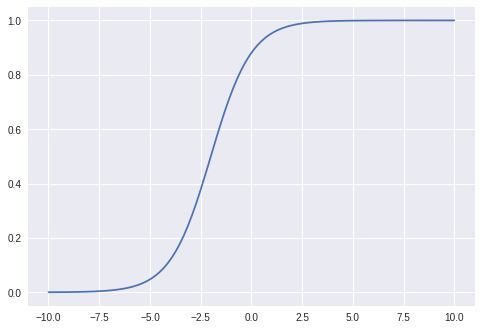

In [14]:
plt.plot(x2, Y)
plt.show()

In [0]:
from mpl_toolkits import mplot3d

In [0]:
w1 = 2
w2 = .8
b = 2
XX1, XX2 = np.meshgrid(x1, x2)

In [17]:
print(XX1.shape, XX2.shape)

(100, 100) (100, 100)


In [0]:
YY = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red", "orange", "black"])
plt.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.7)# it represents the output using cololrs i.e. y is displayed from 0 to 1 as white to black
plt.plot(X,'*')  # just fun
plt.show()                                  # alpha here represents the opacity

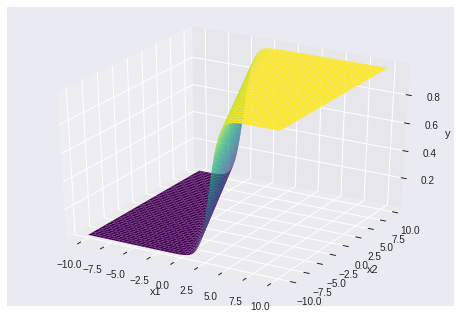

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, YY, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

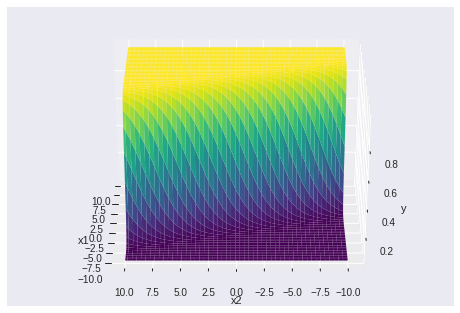

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, YY, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

ax.view_init(30, 180)  # for better viewing in detail of x1 & x2

In [0]:
X = np.random.random(25) * 20 - 10  #because we want x to be in between -10 to 10
print(X)

In [0]:
wt = .5
b_unknown = 0.25

Y = sigmoid(X, wt, b_unknown)

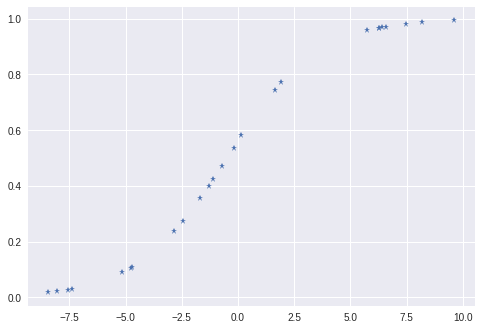

In [24]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def loss(X, Y, w_new, b_new):
  loss = 0
  for x,y in zip(X, Y):
    loss+= (y - sigmoid(x, w_new, b_new))**2
  return loss  

In [0]:
w_new = np.linspace(0, 2, 101)
b_new = np.linspace(0, 2, 101)

WW, BB = np.meshgrid(w_new, b_new)

In [27]:
print(WW)

[[0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 ...
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]
 [0.   0.02 0.04 ... 1.96 1.98 2.  ]]


In [0]:
W_nee = np.meshgrid(w_new)  # to check if single argument returns a matrix or not

In [0]:
print(W_nee)

In [0]:
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = loss(X, Y, WW[i,j],BB[i,j])

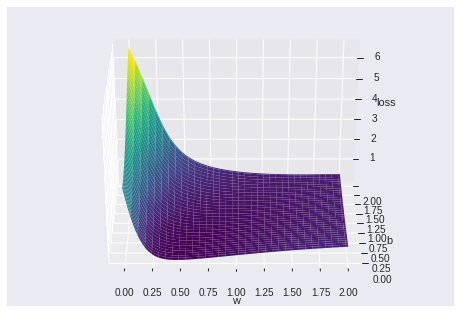

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');

ax.view_init(30,270)

In [0]:
ij = np.argmin(Loss)  # gives u location number of min value in a matrix

i = int(np.floor(ij/Loss.shape[1]))  # floor will return float but i,j are indices which cannot be float so int()
j = int(ij - i* Loss.shape[1])

In [33]:
print(i, j)

12 25


In [34]:
print(WW[i, j], BB[i, j])

0.5 0.24


#Loading Data Set

#Sigmoid Neuron Class

Dealing with differentiation means using Gradient Descent


In [0]:
class sigmoid:
  
  def __init__(self):
    self.w = None
    self.b = None
   
  def perceptron(self, x):            # basically perceptron does that
    return np.dot(self.w, x) + self.b
  
  def model(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.model(self.perceptron(x)) 
    return (y_pred -y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.model(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs = 1, lr = 1, initialize = True): # if w & b r already initialized then pass initialize = False
    
    wt_matrix = list()
    
    if initialize:      
      self.w = np.random.randn(1, X.shape[1])  # 1 tells us that we want one set of values
      self.b = 0
      
    for i in range(epochs):
      dw = 0
      db = 0  #value of w & b should not be set to 0 each time epoch is run because that will make no sense to epochs
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr * dw    # we can keep changing w&b inside the loop just like perceptron but their we were changing w&b on basis of x value & here we r changing
      self.b -= lr * db    # em on basis of dw & db value so it doesn't matters if we do small changes inside the loop or directly subtract em outside loop
      wt_matrix.append(self.w.copy())  #.copy() otherwise only last value of w will be appended epoch number of times
      
    return np.array(wt_matrix)  
    

In [36]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y = [1 ,1 ,1 ,0 ,0 ,0]
for x,y in zip(X,Y):
  print(x, y)

[2.5 2.5] 1
[ 4. -1.] 1
[ 1. -4.] 1
[3.   1.25] 0
[2. 4.] 0
[1. 5.] 0


In [0]:
sm = sigmoid()

In [0]:
wt_matrix = sm.fit(X, Y, 10, .5, True)
print(wt_matrix, sm.b)

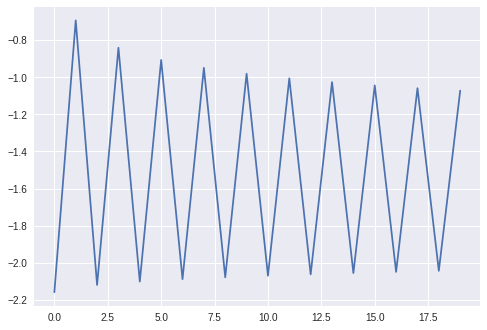

In [39]:
plt.plot(wt_matrix.ravel())  # .ravel() because there's double list inside the wt_matrix. So, gotta ravel it
plt.show()

In [0]:
def plot_the_shit(X, Y, sm):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  
  XXX1, XXX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XXX1.shape)
  
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray(X1[j], X2[i])
      YY[i,j] = sm.model(sm.perceptron(val))
  plt.contourf(XXX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
  plt.scatter(X[:,0], X[:,1], c=Y, cmap = my_cmap)
  plt.plot()

In [0]:
plot_the_shit(X, Y, sm)

In [42]:
!ls

sample_data


In [43]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

    100% |████████████████████████████████| 993kB 19.4MB/s 
Uploaded file with ID 1OaUmi04JKPcg4cW7O6C9uhIg5LKOQoF4


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1HwkFnPQPUAjzvLp2Lp0015l8aU23phmE'     #https://drive.google.com/open?id=1HwkFnPQPUAjzvLp2Lp0015l8aU23phmE
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned.csv')

In [0]:
import pandas as pd
import numpy as np

In [47]:
!ls

adc.json  mobile_cleaned.csv  sample_data


In [0]:
file = pd.read_csv('mobile_cleaned.csv')

In [0]:
print(file)

In [50]:
file.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [51]:
Y_real = file['Rating']
Y_real.head()

0    4.5
1    4.5
2    4.4
3    4.3
4    4.4
Name: Rating, dtype: float64

In [0]:
threshold = 4.2   #each time you change the threshold it will map all to 0 because values had already been mapped to 0 & 1 for previous threshold
file['Rating'] = (file['Rating'] >= threshold).astype(np.int)

In [53]:
file.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,1


In [54]:
file.shape

(341, 88)

In [0]:
print(file['Rating'])

In [56]:
file['Rating'].value_counts(normalize = True)  #re run from file read each time u change threshold 

0    0.533724
1    0.466276
Name: Rating, dtype: float64

In [57]:
X = file.drop('Rating', axis = 1)
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [58]:
Y = file['Rating']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Rating, dtype: int64

#Standardization

z = (x - u)/s , where u is the mean & s is the standard deviation of dataset given for fit

In [0]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
R = np.random.random((100, 1))

In [0]:
print(R)

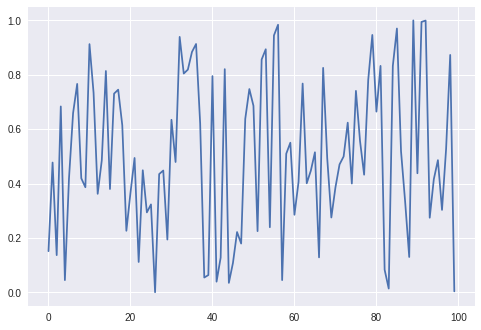

In [62]:
plt.plot(R)
plt.show()

In [63]:
np.mean(R)

0.5017620793581486

In [64]:
np.std(R)

0.2871295278187253

In [0]:
scaler = StandardScaler()  #object or instance formation of StandardScaler class

In [66]:
scaler.fit(R)  # fit takes the dataset from which it learns /  parameters learned in fit model are used to transform

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaler.mean_

array([0.50176208])

In [0]:
RT = scaler.transform(R)  #transform means the dataset will have a mean value of 0 & standard deviation of 1

In [69]:
scaler.mean_  #it will only contain the mean of the fit model. For the mean of transformed model use numpy

array([0.50176208])

In [70]:
np.mean(RT)   # nearly equal to 0

-6.88338275267597e-17

In [71]:
np.std(RT)  # Standard deviation of 1

1.0

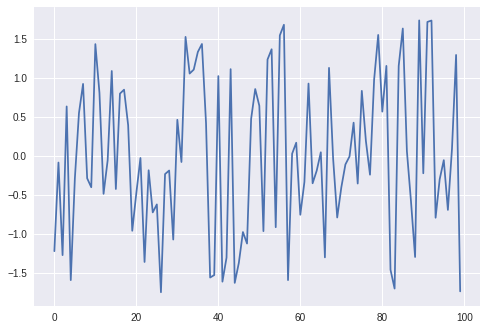

In [72]:
plt.plot(RT)
plt.show()

#Train_Test Split & Standardize

Always split before standardizing data<br />
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).<br />

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_real, random_state = 0, stratify = Y)  #use binarised Y to arrange

In [75]:
print(X_train.shape, X_test.shape, Y_test.shape)

(255, 87) (86, 87) (86,)


In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)  # fit using the train data & transform both using those same parameters learned from fit
X_scaled_test = scaler.transform(X_test)

In [0]:
scaler.mean_  # it always shows the mean of fitting data

In [0]:
X_scaled_test = pd.DataFrame(X_scaled_test)  #gotta convert in pandas dataframe to use head

In [80]:
X_scaled_test.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1.046444,1.981230,0.310285,0.517391,-0.102371,0.772151,-0.080730,1.044425,0.513703,-0.006540,...,-0.141421,-0.062746,-0.258738,-0.062746,0.590937,-0.437709,-0.322329,-0.141421,-0.155230,0.212325
1,-1.310986,0.748945,1.145940,0.250136,-0.102371,0.661260,1.263849,0.766463,0.513703,0.304210,...,-0.141421,-0.062746,-0.258738,-0.062746,-1.692228,2.284625,-0.322329,-0.141421,-0.155230,0.212325
2,-1.720004,0.748945,1.145940,0.250136,-0.120563,0.661260,1.263849,0.766463,-0.334843,0.304210,...,-0.141421,-0.062746,-0.258738,-0.062746,-1.692228,2.284625,-0.322329,-0.141421,-0.155230,0.212325
3,1.276981,0.121177,-1.778854,-1.175222,-0.138754,-0.669435,-1.526574,-2.235525,-0.759116,-1.456706,...,-0.141421,-0.062746,-0.258738,-0.062746,-1.692228,-0.437709,3.102418,-0.141421,6.442049,-4.709758
4,-1.511776,-0.855351,1.006665,0.250136,-0.102371,-0.004088,0.987057,0.644160,0.513703,1.060368,...,-0.141421,-0.062746,-0.258738,-0.062746,0.590937,-0.437709,-0.322329,-0.141421,-0.155230,0.212325


In [0]:
from sklearn.preprocessing import MinMaxScaler  # the output cannot be standardized because it may give -ve values out of 0 & 1 but sigmoid predicts results between 0 & 1 only

In [0]:
minmax = MinMaxScaler()

In [0]:
Y_scaled_train = minmax.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax.transform(Y_test.reshape(-1,1))

In [0]:
Y_scaled_train = pd.DataFrame(Y_scaled_train)

In [85]:
Y_scaled_train.head()

,0
0,0.68
1,0.72
2,0.72
3,0.60
4,0.80


In [86]:
np.max(Y_scaled_test)

1.0

In [87]:
np.min(Y_scaled_train) 

0    0.0
dtype: float64

In [88]:
np.min(Y_scaled_test)   # maybe min of test data won't be 0 because of train fit parameters we changed the test model

0.11999999999999988

In [0]:
scaled_threshold = list(minmax.transform(np.asarray([threshold]).reshape(-1,1)))[0][0]

In [90]:
print(scaled_threshold)

0.6800000000000002


In [0]:
Y_binary_train = (np.array(Y_scaled_train) > scaled_threshold).astype(np.int).ravel()

In [0]:
print(Y_binary_train)

In [0]:
Y_binary_test = (Y_scaled_test > scaled_threshold).astype(np.int).ravel()

In [94]:
print(Y_binary_test)

[0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0]


#Sigmoid Class on Real Data

In [0]:
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook

In [0]:
class sigmoid:
  
  def __init__(self):
    self.w = None
    self.b = None
   
  def perceptron(self, x):            # basically perceptron does that
    return np.dot(self.w, x) + self.b
  
  def model(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def predict(self, X):
    Y_pred = list()
    for x in X:
      y_pred = self.model(self.perceptron(x))
      Y_pred.append(y_pred)
      
    return np.array(Y_pred)  
  
  def grad_w(self, x, y):
    y_pred = self.model(self.perceptron(x)) 
    return (y_pred -y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.model(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs = 1, lr = 1, initialize = True,display_loss = False): # if w & b r already initialized then pass initialize = False
    
    wt_matrix = list()
    
    if initialize:      
      self.w = np.random.randn(1, X.shape[1])  # 1 tells us that we want one set of values
      self.b = 0
      
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
      dw = 0
      db = 0  #value of w & b should not be set to 0 each time epoch is run because that will make no sense to epochs
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr * dw    # we can keep changing w&b inside the loop just like perceptron but their we were changing w&b on basis of x value & here we r changing
      self.b -= lr * db    # em on basis of dw & db value so it doesn't matters if we do small changes inside the loop or directly subtract em outside loop
      wt_matrix.append(self.w.copy())  #.copy() otherwise only last value of w will be appended epoch number of times
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
    return np.array(wt_matrix)  
    

In [0]:
sn = sigmoid()

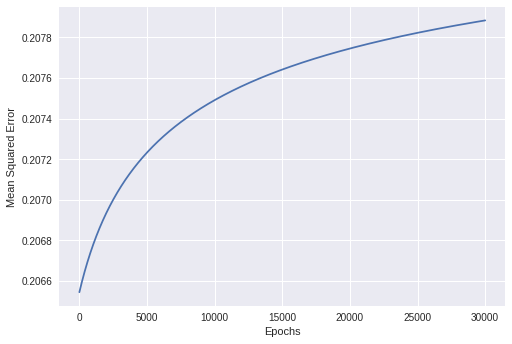

array([[[ 0.5897096 , -0.27160167, -0.00468142, ..., -0.236774  ,
          0.47016653,  1.17345086]],

       [[ 0.58970459, -0.27159819, -0.00468155, ..., -0.23677345,
          0.47016713,  1.17345004]],

       [[ 0.58969958, -0.27159472, -0.00468167, ..., -0.23677291,
          0.47016773,  1.17344922]],

       ...,

       [[ 0.55871287, -0.2500865 , -0.00543847, ..., -0.23340016,
          0.4738698 ,  1.1683855 ]],

       [[ 0.55871251, -0.25008625, -0.00543848, ..., -0.23340012,
          0.47386984,  1.16838544]],

       [[ 0.55871215, -0.250086  , -0.00543849, ..., -0.23340008,
          0.47386989,  1.16838538]]])

In [98]:
sn.fit(X_scaled_train, Y_scaled_train, 30000, 0.001, True, True)

In [0]:
X_scaled_test = np.array(X_scaled_test)  # else there will be a 2d Y_pred_test. Always do calculations in numpy array

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [101]:
print(X_scaled_test.shape, Y_pred_train.shape, Y_pred_test.shape)

(86, 87) (255, 1) (86, 1)


In [0]:
print(Y_pred_test)   #output between 0 & 1

In [0]:
Y_pred_binary_train = (Y_pred_train > scaled_threshold).astype(np.int).ravel()

In [0]:
Y_pred_binary_test = (Y_pred_test > scaled_threshold).astype(np.int).ravel()

In [105]:
print(Y_pred_binary_test)

[1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 0]


In [106]:
Y_pred_binary_test.shape

(86,)

In [107]:
accuracy_score(Y_pred_binary_train, Y_binary_train)  #accuracy can differ because maybe weights r random

0.6588235294117647

In [108]:
accuracy_score(Y_pred_binary_test, Y_binary_test)

0.5465116279069767